<center><a target="_blank" href="https://academy.constructor.org/">
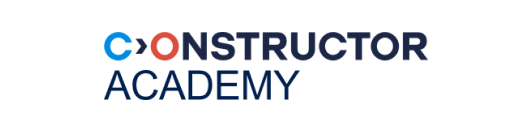</a> </center>
<hr />

# <h1 align="center"> Live coding 1: JSON </h1>

<hr />
<center>Constructor Academy, 2025</center>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> learn how to create, read and write JSON files</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>The JSON String</a></li>
            <li> <a style="color:#303030" href='#P2'>Serialization/Deserialization</a></li>
            <li> <a style="color:#303030" href='#P3'>Write and Read JSON Files</a></li>
            <li> <a style="color:#303030" href='#P4'>Read JSON From URL</a></li>
            <li> <a style="color:#303030" href='#P5'>Explore deserialized JSON strings (dictionaries!)</a></li>
        </ol>
        <strong>Topics Trained:</strong> Requests, REST APIs, JSON
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://constructor.app/learn/courses/f45190af-1e40-4fb3-b0f4-b062878d55a9/view/content/5ff0f127-9f6c-481d-91fb-27af0a765669" title="momentum"> Module 1, The Data Science Toolkit </a>|
        <a style="color:#00BAE5" href="https://constructor.app/learn/courses/f45190af-1e40-4fb3-b0f4-b062878d55a9/view/content/5ff0f127-9f6c-481d-91fb-27af0a765669/6fae75a0-535c-4bb3-ae75-07cbda932024" title="momentum">Day 3, JSON, REST APIS, the Request Module </a>|
        <a style="color:#00BAE5" href="https://drive.google.com/uc?export=download&id=1U4jqdswBXkCL2qzkubximUNPh9MT8SBr" title="momentum"> Live Coding 1, JSON</a>
</strong></nav>

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [2]:
import json, requests
from pandas import json_normalize

<a id='P1' name="P1"></a>
## [The JSON String](#P0)

- JSON - Javascript Object Notation
- Standard for exchanging data between client (browser) and server
- Replaced XML as standard for the web (more compact and easier to read)
- Set of key/value pairs
- Easy to serialise objects

Example of a JSON string:

In [3]:
json_string = """
{
 "batch_tag": "Month Year Location",
 "start_date": {"month": "xx"},
 "curriculum": {"Week1": "DS Toolkit", "Week2":"?"},
 "students": [
             {"name": "first_name", "surname": "last_name"}
             ]}
"""

In [4]:
json_string

'\n{\n "batch_tag": "Month Year Location",\n "start_date": {"month": "xx"},\n "curriculum": {"Week1": "DS Toolkit", "Week2":"?"},\n "students": [\n             {"name": "first_name", "surname": "last_name"}\n             ]}\n'

### JSON vs XML

- XML - Extensible Markup Language
- JSON - JavaScript Object Notation


In [5]:
XML = """
<users>
    <user>
        <username>SammyShark</username> <location>Indian Ocean</location>
    </user>
    <user>
        <username>JesseOctopus</username> <location>Pacific Ocean</location>
    </user>
    <user>
        <username>DrewSquir</username> <location>Atlantic Ocean</location>
    </user>
    <user>
        <username>JamieMantisShrimp</username> <location>Pacific Ocean</location>
    </user>
</users>"""

print(len(XML))  # 417 chars

JSON = """
{"users": [
      {"username" : "SammyShark", "location" : "Indian Ocean"},
      {"username" : "JesseOctopus", "location" : "Pacific Ocean"},
      {"username" : "DrewSquid", "location" : "Atlantic Ocean"},
      {"username" : "JamieMantisShrimp", "location" : "Pacific Ocean"}
] }
"""
print(len(JSON))

# 284 chars

417
284


<a id='P2' name="P2"></a>
## [Serialization/Deserialization](#P0)

- Serialization - convert the data into the format suitable for sending over the network
- Deserialization - from  network format to local data

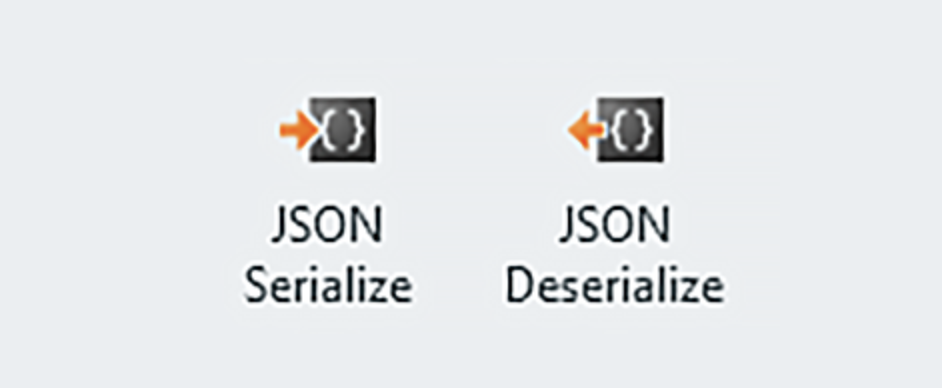

### Receive the reply from server - deserialize:

In [6]:
json_string

'\n{\n "batch_tag": "Month Year Location",\n "start_date": {"month": "xx"},\n "curriculum": {"Week1": "DS Toolkit", "Week2":"?"},\n "students": [\n             {"name": "first_name", "surname": "last_name"}\n             ]}\n'

In [7]:
# FIRST load from strings, deserialize, get python dict
dict_from_string = json.loads(json_string)
dict_from_string

{'batch_tag': 'Month Year Location',
 'start_date': {'month': 'xx'},
 'curriculum': {'Week1': 'DS Toolkit', 'Week2': '?'},
 'students': [{'name': 'first_name', 'surname': 'last_name'}]}

In [8]:
type(dict_from_string)

dict

In python JSON files are deserialized as dictionaries:
- 'value' can be almost anything  
- 'key' should be immutable!   

A tuple can also be a dictionary key.
However, neither a list nor another dictionary can serve as a dictionary key, because lists and dictionaries are mutable.

### Pass arguments to remote – serialize  

Dump json into string, serialize ``obj`` to a JSON formatted ``str`` (if you want to store or transmit data).  
Returns the JSON string representation of the python dict.

In [9]:
new_json_string = json.dumps(dict_from_string)
new_json_string

'{"batch_tag": "Month Year Location", "start_date": {"month": "xx"}, "curriculum": {"Week1": "DS Toolkit", "Week2": "?"}, "students": [{"name": "first_name", "surname": "last_name"}]}'

In [10]:
type(new_json_string)

str

<a id='P3' name="P3"></a>
## [Write and Read JSON Files](#P0)

In [ ]:
# save as json file (dump), it is a string, not dictionary
with open("ds_program.json", "w") as output:
    json.dump(dict_from_string, output)

In [ ]:
# open as json file (load)
with open("ds_program.json") as json_file:
    data_json1 = json.load(json_file)
data_json1

In [ ]:
# another way to load the json file (shorter)
data_json2 = json.load(open("ds_program.json"))

In [ ]:
data_json2

<a id='P4' name="P4"></a>
## [Read JSON from a URL](#P0)

**Exercise** 5 min:   
Load .json from URL. Try translating the following instruction into code:

1. use `requests` library and `get` function of this library to send a HTTPS request to the URL.
2. print the content attribute of the object that is returned from the get request.
3. Then, deserialize the content attribute
4. explore the obtained dictionary

In [22]:
url = "https://api.balldontlie.io/v1/players"
headers = {'Authorization': 'a25e92f0-92a2-4ed3-be24-028c4a7ab620'}

https://requests.readthedocs.io/en/latest/user/quickstart/#make-a-request

In [ ]:
r = requests.get(url=url)    # 401 - problem from the client (our) side - no authurization
r

<Response [401]>

In [29]:
r = requests.get(url=url, headers=headers)    # share authorization key as headers
r

<Response [200]>

In [31]:
r.headers

{'Date': 'Wed, 06 Aug 2025 09:24:53 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '1656', 'Connection': 'keep-alive', 'access-control-allow-credentials': 'true', 'access-control-allow-headers': 'Origin, X-Requested-With, Content-Type, Accept, Authorization', 'access-control-allow-methods': 'GET, POST, OPTIONS, PUT, PATCH, DELETE', 'access-control-allow-origin': '*', 'Content-Encoding': 'br', 'etag': 'W/"2328-rM0+xiBBRFIZLr57jf0L+sCNLHo"', 'rndr-id': '8c3629fd-3229-4ffa', 'vary': 'Accept-Encoding', 'x-powered-by': 'Express', 'x-ratelimit-limit': '5', 'x-ratelimit-remaining': '2', 'x-ratelimit-reset': '1754472331', 'x-render-origin-server': 'Render', 'cf-cache-status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '96ad7bd1da78e509-TXL', 'alt-svc': 'h3=":443"; ma=86400'}

In [30]:
r.text

'{"data":[{"id":1,"first_name":"Alex","last_name":"Abrines","position":"G","height":"6-6","weight":"190","jersey_number":"8","college":"FC Barcelona","country":"Spain","draft_year":2013,"draft_round":2,"draft_number":32,"team":{"id":21,"conference":"West","division":"Northwest","city":"Oklahoma City","name":"Thunder","full_name":"Oklahoma City Thunder","abbreviation":"OKC"}},{"id":2,"first_name":"Jaylen","last_name":"Adams","position":"G","height":"6-0","weight":"225","jersey_number":"10","college":"St. Bonaventure","country":"USA","draft_year":null,"draft_round":null,"draft_number":null,"team":{"id":1,"conference":"East","division":"Southeast","city":"Atlanta","name":"Hawks","full_name":"Atlanta Hawks","abbreviation":"ATL"}},{"id":3,"first_name":"Steven","last_name":"Adams","position":"C","height":"6-11","weight":"265","jersey_number":"12","college":"Pittsburgh","country":"New Zealand","draft_year":2013,"draft_round":1,"draft_number":12,"team":{"id":11,"conference":"West","division":"

There is actually a more concise way of deserializing the content of the response object returned by the get function: you can directly use the method `.json()` on it. Try and see if it works!

### Questions

- Remember examples on how did you use APIs recently, name several such cases.
- Try to extend 'ds' dictionary with additional key-value pair and access this key.  
- API for data retrieval - what can interfere with fast and painless data mining?



<a id='P5' name="P5"></a>
## [Explore deserialized JSON strings (dictionaries!)](#P0)

In [34]:
nba_json.items()

NameError: name 'nba_json' is not defined

Most straightforward way to get keys (or values) is  

```python
my_dict.keys()
my_dict.values()
```

but keep in mind - it is not possible to access specific key by index (in python 3)

In [33]:
nba_json.keys()

NameError: name 'nba_json' is not defined

In [ ]:
nba_json.values()  # values() might be confusing

In [ ]:
nba_json["meta"]  # not much here

In [ ]:
nba_json["data"]  # this looks more interesting

In [ ]:
# since its a list of items we can dive in further
nba_json["data"][0]

In [ ]:
nba_json["data"][0].keys()  # [0]

Sometimes you need to loop through items

In [ ]:
# if index is not needed
for player in nba_json['data']:
    # Access the division of each player
    division = player['team']['division']
    # Print the division of each player
    print(f"Division: {division}")

In [ ]:
# if index is needed -> enumerate
for index, player in enumerate(nba_json['data']):
    # Access the division of each player
    division = player['team']['division']
    # Print the index and the division of each player
    print(f"Player {index + 1} is in the {division} division.")

In [ ]:
# Initialize a set to store unique divisions
unique_divisions = set()

# Loop through each player in the list
for player in nba_json['data']:
    # Extract the division from each player's team data
    division = player['team']['division']
    # Add the division to the set of unique divisions
    unique_divisions.add(division)

# Print all unique divisions
print("Unique Divisions:", unique_divisions)

When there is a pattern, one can try to normalize semi-structured JSON data into a flat table

### Normalization

```python
# Normalize structured JSON data into a flat table
from pandas import json_normalize

json_normalize(...)
```

**Exercise**:

Try to normalize the list of structured dictionaries above

**Summary**:

This was an example on how to access structured data that web services provide us for free and without registration. But this is not always the case. Some of them don't want to work for free (and it is understandable - storing data and providing API cost money). Some of them want to know where the data will go, so they demand registration!

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>